In [207]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
# 一些基础参数配置
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

np.random.seed(42)

In [208]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

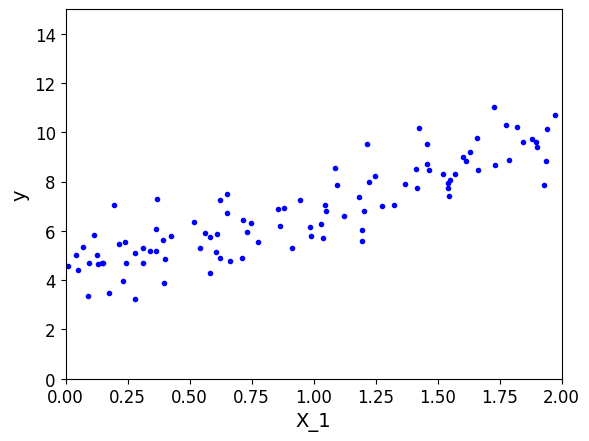

In [209]:
plt.plot(X, y, 'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0, 2, 0, 15])
plt.show()

In [210]:
X_b = np.c_[np.ones((100, 1)), X]  # 加入偏置项
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [211]:
print(theta_best)

[[4.21509616]
 [2.77011339]]


In [212]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[4.21509616],
       [9.75532293]])

In [213]:
X_new

array([[0],
       [2]])

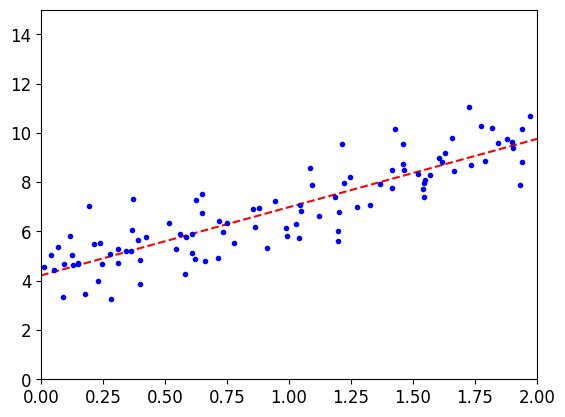

In [214]:
plt.plot(X_new, y_predict, 'r--')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [215]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[2.77011339]]
[4.21509616]


## 梯度下降算法

In [216]:
eta = 0.1  # 学习率
n_iter = 1000  # 迭代次数
m = 100  # 总样本数
theta = np.random.randn(2, 1)
for iter in range(n_iter):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [217]:
theta

array([[4.21509616],
       [2.77011339]])

In [218]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

## 批量梯度下降

In [219]:
theta_path_bdg = []


def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iter = 1000
    for iter in range(n_iter):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, 'b-')
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('X_1')
    plt.axis([0, 2, 0, 15])
    plt.title("eta = {}".format(eta))

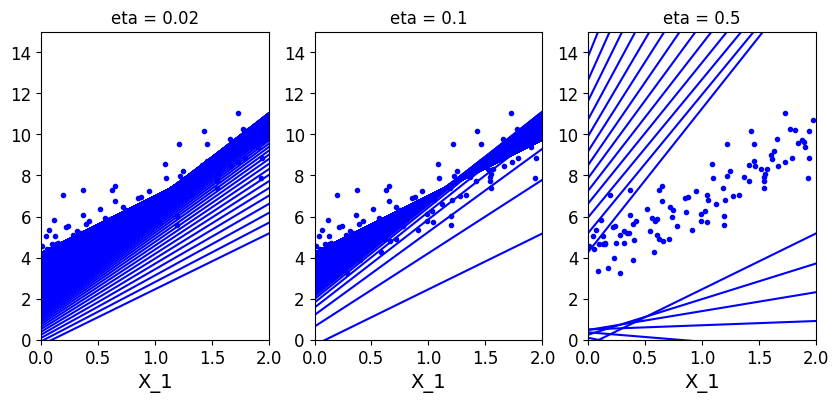

In [220]:
theta = np.random.randn(2, 1)
plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)

plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bdg)

plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

plt.show()

## 随机梯度下降

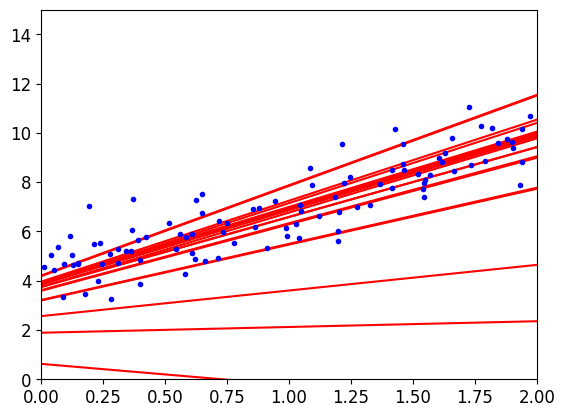

In [221]:
theta_path_sdg = []
m = len(X_b)
n_epochs = 50

t0 = 5
t1 = 50

theta = np.random.randn(2, 1)


# 是学习率递减，后面越学越细
def learn_schedule(t):
    return t0 / (t + t1)


for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, 'r-')
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learn_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sdg.append(theta)
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

## 小批量梯度下降

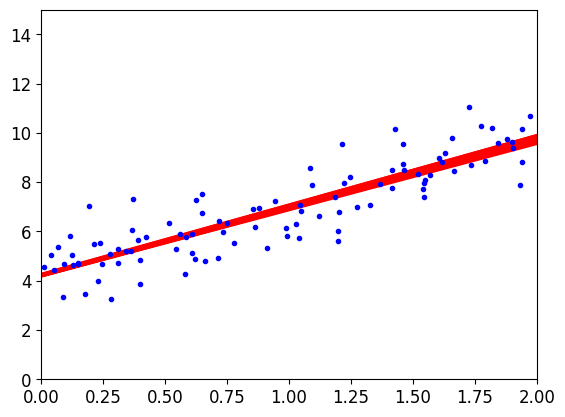

In [222]:
theta_path_mdg = []
n_epochs = 50
minibatch = 16

t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, 'r-')
        t = t + 1
        xi = X_b_shuffled[i:i + minibatch]
        yi = y_shuffled[i:i + minibatch]
        gradients = 2 / minibatch * xi.T.dot(xi.dot(theta) - yi)
        eta = learn_schedule(t)
        theta = theta - eta * gradients
        theta_path_mdg.append(theta)
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

## 三种策略的对比实验

In [223]:
theta_path_bdg = np.array(theta_path_bdg)
theta_path_sdg = np.array(theta_path_sdg)
theta_path_mdg = np.array(theta_path_mdg)

theta_path_sdg

array([[[1.88854424],
        [0.23382921]],

       [[2.56224426],
        [1.04046167]],

       [[3.19750781],
        [2.26732335]],

       ...,

       [[4.18291037],
        [2.72713784]],

       [[4.18378102],
        [2.7285347 ]],

       [[4.18228368],
        [2.72737073]]])

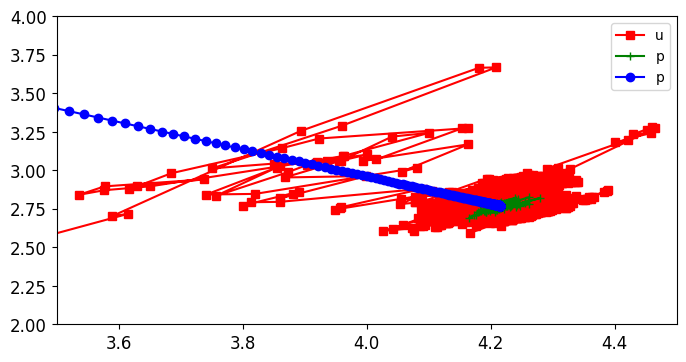

In [224]:
plt.figure(figsize=(8, 4))
plt.plot(theta_path_sdg[:, 0], theta_path_sdg[:, 1], 'r-s', label="SDG")
plt.plot(theta_path_mdg[:, 0], theta_path_mdg[:, 1], 'g-+', label="MDG")
plt.plot(theta_path_bdg[:, 0], theta_path_bdg[:, 1], 'b-o', label="BDG")

plt.legend("upper left")
plt.axis([3.5, 4.5, 2.0, 4.0])
plt.show()

## 多项式回归

In [225]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + np.random.randn(m, 1)

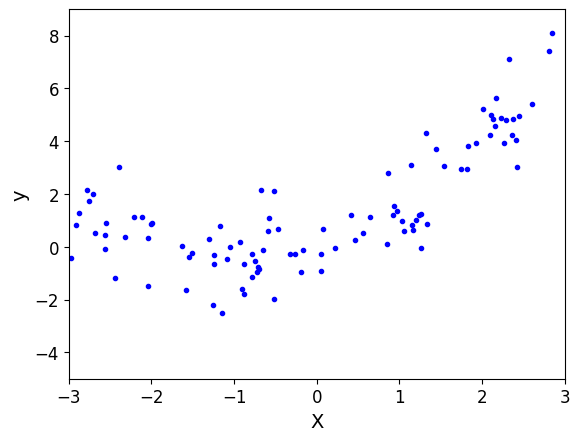

In [226]:
plt.plot(X, y, "b.")
plt.xlabel('X')
plt.ylabel('y')
plt.axis([-3, 3, -5, 9])
plt.show()

In [227]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_ploy = poly_features.fit_transform(X)
X[0]

array([0.93707422])

In [228]:
X_ploy  # X_ploy = [X, X^2]

array([[ 9.37074217e-01,  8.78108089e-01],
       [-7.06576080e-01,  4.99249757e-01],
       [-1.30925011e+00,  1.71413586e+00],
       [ 1.33189888e+00,  1.77395463e+00],
       [ 2.17125089e+00,  4.71433045e+00],
       [ 9.24465318e-01,  8.54636124e-01],
       [ 6.95436639e-02,  4.83632119e-03],
       [-2.04645140e+00,  4.18796333e+00],
       [-2.67924772e+00,  7.17836837e+00],
       [-3.25849259e-01,  1.06177739e-01],
       [-2.70390262e+00,  7.31108937e+00],
       [ 4.16007791e-01,  1.73062483e-01],
       [-7.03624852e-01,  4.95087932e-01],
       [ 1.54313472e+00,  2.38126476e+00],
       [-1.16610902e+00,  1.35981024e+00],
       [ 5.57896206e-01,  3.11248176e-01],
       [ 2.26101131e-01,  5.11217212e-02],
       [-2.97172545e+00,  8.83115213e+00],
       [-2.56566361e+00,  6.58262976e+00],
       [-1.25779073e+00,  1.58203751e+00],
       [ 2.29341049e+00,  5.25973166e+00],
       [-2.11791027e+00,  4.48554391e+00],
       [ 1.26536598e+00,  1.60115107e+00],
       [ 2.

[[0.97553626 0.50284469]]
[-0.02550974]


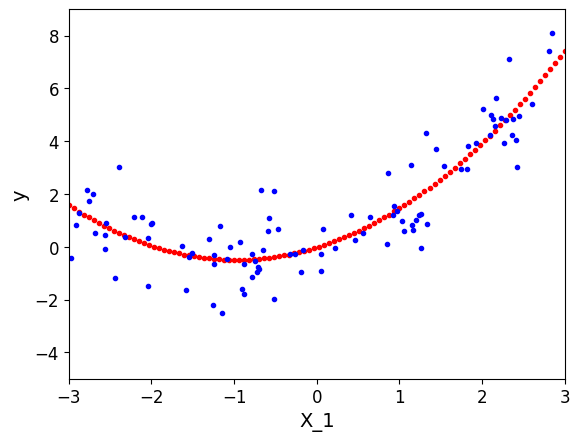

In [229]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_ploy, y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

X_new = np.linspace(-3, 3, num=100).reshape(-1, 1)
X_new_ploy = np.c_[np.ones((100, 1)), X_new, X_new ** 2]
# print(X_new_ploy)
coefficients = np.array([[-0.02550974], [0.97553626], [0.50284469]])
y_poly_predict = X_new_ploy.dot(coefficients)  # [[1,2,3],[]].dot([[1],[2],[3])
plt.plot(X_new, y_poly_predict, 'r.')

plt.plot(X, y, "b.")
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3, 3, -5, 9])
plt.show()

In [230]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_ploy, y)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.97553626 0.50284469]]
[-0.02550974]


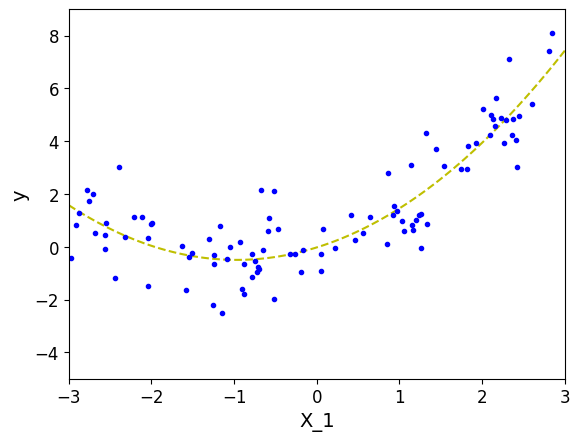

In [231]:
# 简单版本
X_new = np.linspace(-3, 3, num=100).reshape(100, 1)
X_new_ploy = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_ploy)

plt.plot(X_new, y_new, "y--", label="Predict Result")
plt.plot(X, y, "b.")
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3, 3, -5, 9])
plt.show()

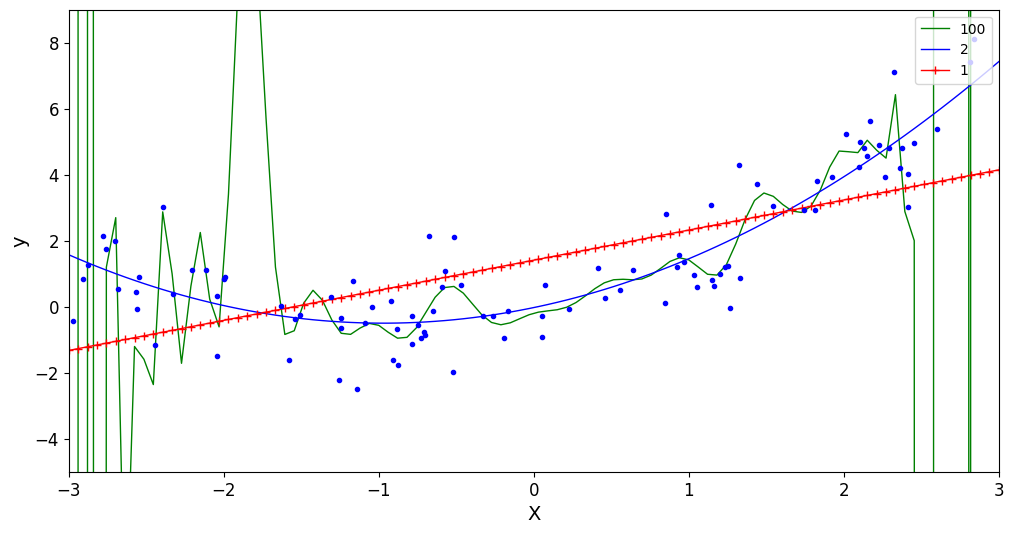

In [232]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 6))
for style, width, degree in (('g-', 1, 100), ('b-', 1, 2), ('r-+', 1, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std = StandardScaler()
    lin_reg = LinearRegression()
    poly_reg = Pipeline([('poly_features', poly_features), ('StandardScaler', std), ('LinearRegression', lin_reg)])
    poly_reg.fit(X, y)
    y_new = poly_reg.predict(X_new)
    plt.plot(X_new, y_new, style, label=str(degree), linewidth=width)
plt.plot(X, y, "b.")
plt.xlabel('X')
plt.ylabel('y')
plt.axis([-3, 3, -5, 9])
plt.legend(loc='upper right')
plt.show()

## 数据样本数量对结果的影响

In [233]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        # 对于不同数量的测试数据，进行数据拟合
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        # 训练集MSE & 验证机MSE    MSE: 均方误差
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-', linewidth=2, label='Train Error')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('RMSE')
    plt.legend(loc='upper right')

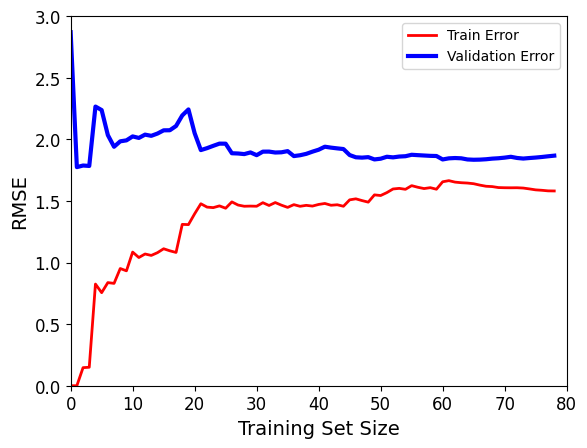

In [234]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

### 正则化

$J(\theta)=MSE(\theta)+\frac{q}{2}\sum_{i=1}^{n}\theta_{i}^{2}$

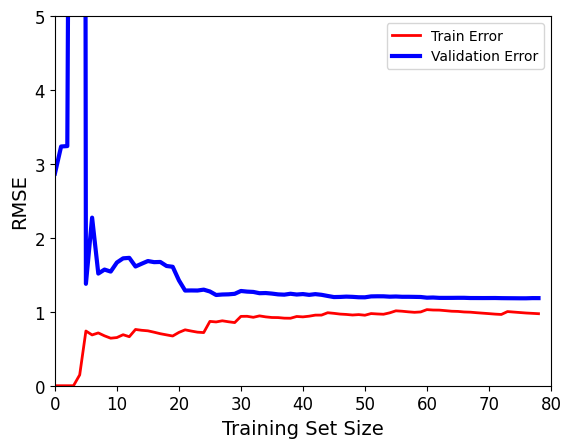

In [235]:
poly_reg = Pipeline(
    [('poly_features', PolynomialFeatures(degree=3, include_bias=False)), ('LinearRegression', LinearRegression())])
plot_learning_curves(poly_reg, X, y)
plt.axis([0, 80, 0, 5])
plt.show()

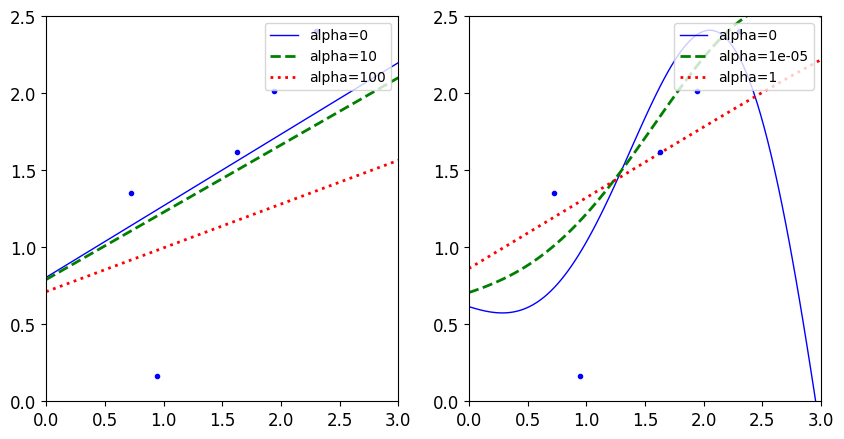

In [236]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.randn(m, 1)
y = 0.5 * X + np.random.randn(m, 1) / 1.5 + 1
X_new = np.linspace(0, 3, 100).reshape(100, 1)


def plot_model(model_class, poly, alphas, **model_kwargs):
    # 创(Ridge回归模型，传入alpha和其它参数
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha,**model_kwargs)
        if poly:
            model = Pipeline(
                [('poly_features', PolynomialFeatures(degree=10, include_bias=False)), ('Std', StandardScaler()),
                 ('ridge_regressor', model)])
        model.fit(X, y)
        y_new_predict = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_predict, style, linewidth = lw, label = 'alpha={}'.format(alpha))
    
    plt.plot(X, y, 'b.',linewidth =3)
    plt.axis([0, 3, 0, 2.5])
    plt.legend(loc='upper right')

plt.figure(figsize=(10,5))

plt.subplot(121)
plot_model(Ridge, poly=False, alphas=(0,10,100))

plt.subplot(122)
plot_model(Ridge, poly=True, alphas=(0,10**-5,1))


plt.show()

C:\Users\ASUS\.conda\envs\DeepLearning\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\ASUS\.conda\envs\DeepLearning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\ASUS\.conda\envs\DeepLearning\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.859e+00, tolerance: 4.176e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV

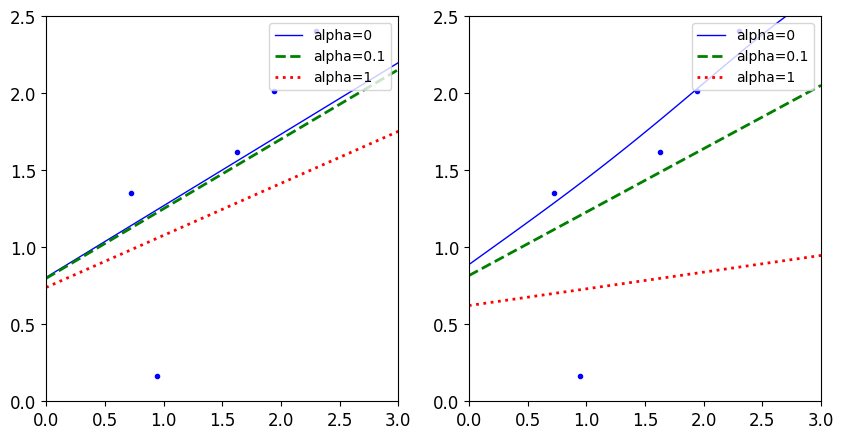

In [237]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(10,5))

plt.subplot(121)
plot_model(Lasso, poly=False, alphas=(0,0.1,1))

plt.subplot(122)
plot_model(Lasso, poly=True, alphas=(0,10**-1,1))


plt.show()